In [ ]:
!wget https://he-s3.s3.ap-southeast-1.amazonaws.com/media/hackathon/ia-for-ai/audio-files-6-757eba7a/dbb3bd26ead211eb.zip

--2021-08-23 06:40:36--  https://he-s3.s3.ap-southeast-1.amazonaws.com/media/hackathon/ia-for-ai/audio-files-6-757eba7a/dbb3bd26ead211eb.zip
Resolving he-s3.s3.ap-southeast-1.amazonaws.com (he-s3.s3.ap-southeast-1.amazonaws.com)... 52.219.32.191
Connecting to he-s3.s3.ap-southeast-1.amazonaws.com (he-s3.s3.ap-southeast-1.amazonaws.com)|52.219.32.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 435471753 (415M) [application/zip]
Saving to: ‘dbb3bd26ead211eb.zip’

dbb3bd26ead211eb.zi 100%[===================>] 415.30M  66.6MB/s    in 6.7s    

2021-08-23 06:40:43 (61.6 MB/s) - ‘dbb3bd26ead211eb.zip’ saved [435471753/435471753]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dbb3bd26ead211eb.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/dataset/train.csv')

In [ ]:
test = pd.read_csv('/content/dataset/test.csv')

In [ ]:
train.head()

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [ ]:
test.head()

,filename
0,26199.mp3
1,692.mp3
2,16821.mp3
3,1608.mp3
4,47947.wav


In [ ]:
durations = []
for f in train.filename:
    signal, sample_rate = librosa.load("/content/dataset/TrainAudioFiles/"+f)
    durations.append(librosa.get_duration(y=signal, sr=sample_rate))
    print(len(durations))

In [ ]:
testdurations = []
for f in test.filename:
    signal, sample_rate = librosa.load("/content/dataset/TestAudioFiles/"+f)
    testdurations.append(librosa.get_duration(y=signal, sr=sample_rate))
    print(len(testdurations))

In [ ]:
durations = np.array(durations)

In [ ]:
testdurations = np.array(testdurations)

In [ ]:
durations.mean()

3.08894748087222

In [ ]:
testdurations.mean()

3.184684195775689

In [ ]:
train['durations'] = durations

In [ ]:
test['durations'] = testdurations

In [ ]:
train.head()

,filename,emotion,durations
0,18777.mp3,neutral,2.44000
1,24041.mp3,neutral,3.36000
2,1621.mp3,joy,0.34068
3,28883.mp3,neutral,1.56000
4,14918.mp3,neutral,2.82000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51888f07d0>]],
      dtype=object)

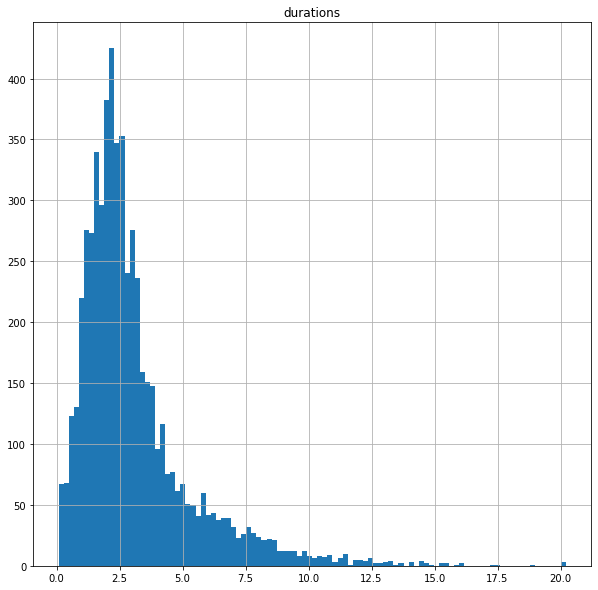

In [ ]:
train.hist(column='durations', bins=100, figsize=(10,10))

In [ ]:
train.emotion.value_counts()

neutral     2630
joy          967
surprise     640
anger        596
sadness      344
fear         328
disgust      311
Name: emotion, dtype: int64

In [ ]:
train.to_csv('/content/drive/MyDrive/Training data/train.csv')

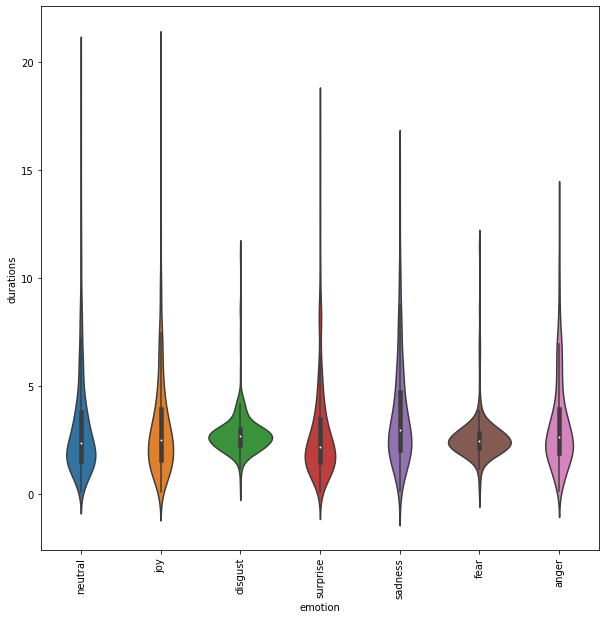

In [ ]:
_, ax = plt.subplots(figsize=(10,10))
sns.violinplot(ax=ax, x="emotion", y="durations", data=train)
plt.xticks(rotation=90)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dbb4cfcd0>]],
      dtype=object)

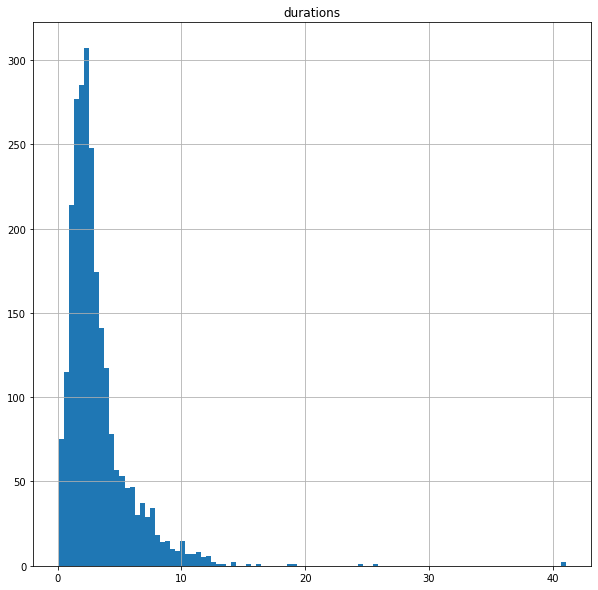

In [ ]:
test.hist(column='durations', bins=100, figsize=(10,10))

In [ ]:
test.to_csv('/content/drive/MyDrive/Training data/test.csv')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0.5, 1.0, 'Waveform')

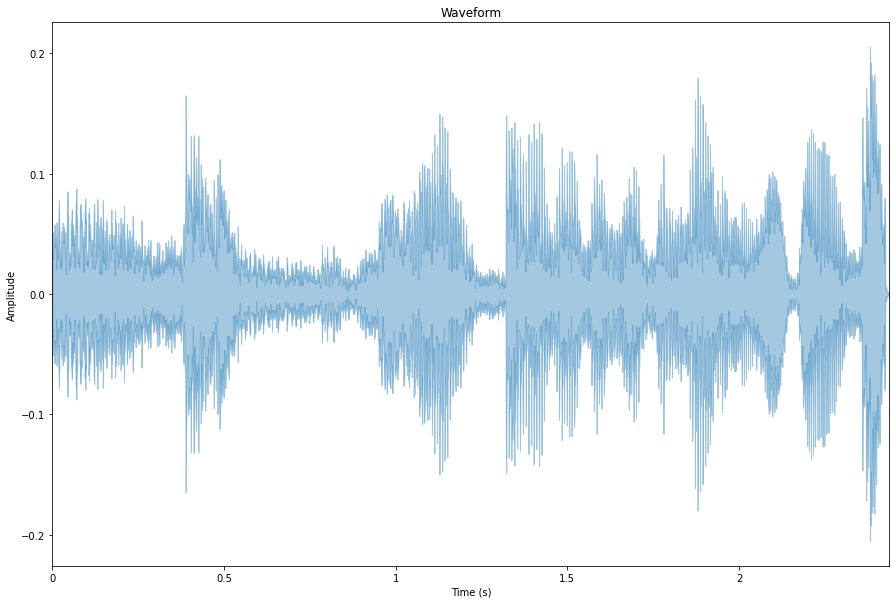

In [ ]:
FIG_SIZE = (15,10)

file = "/content/dataset/TrainAudioFiles/18777.mp3"

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [ ]:
train.head()

,filename,emotion,durations
0,18777.mp3,neutral,2.44000
1,24041.mp3,neutral,3.36000
2,1621.mp3,joy,0.34068
3,28883.mp3,neutral,1.56000
4,14918.mp3,neutral,2.82000


In [ ]:
y, sr = librosa.load('/content/dataset/TrainAudioFiles/1621.mp3')
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(128, 15)

In [ ]:
signal.shape

(53802,)

In [ ]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power spectrum')

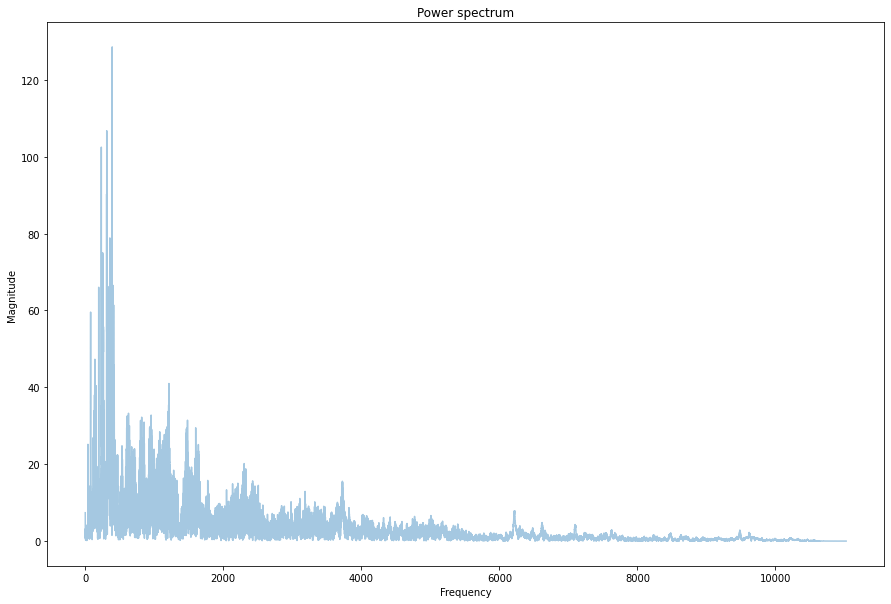

In [ ]:
# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
# STFT -> spectrogram
hop_length = signal.shape[0]//99 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

STFT hop length duration is: 0.024625850340136056s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

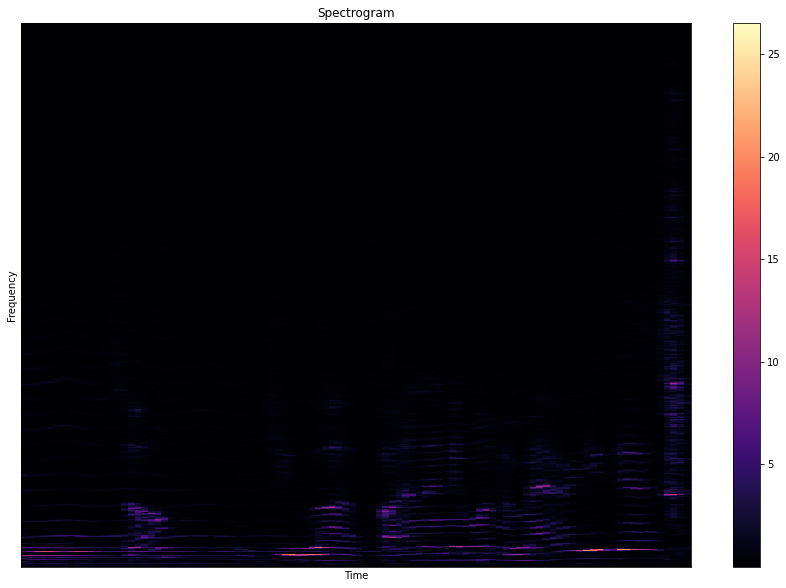

In [ ]:
# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

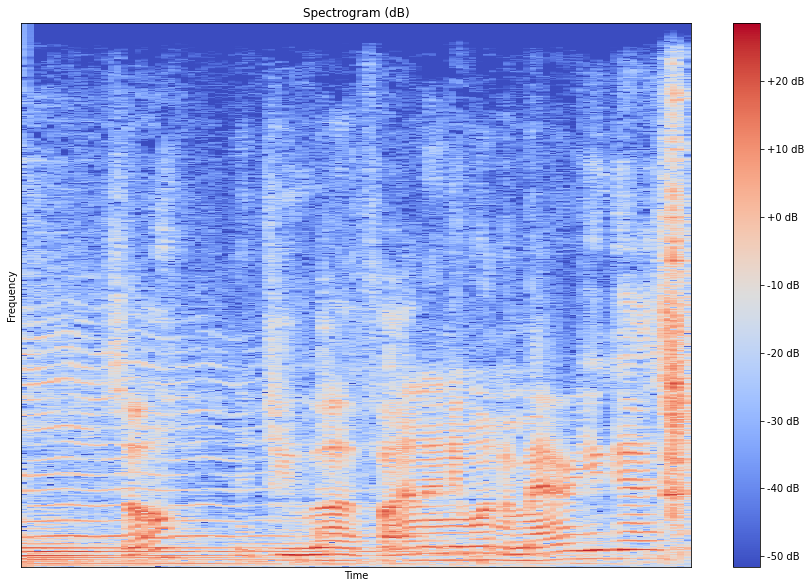

In [ ]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
spectrogram.shape

(1025, 100)

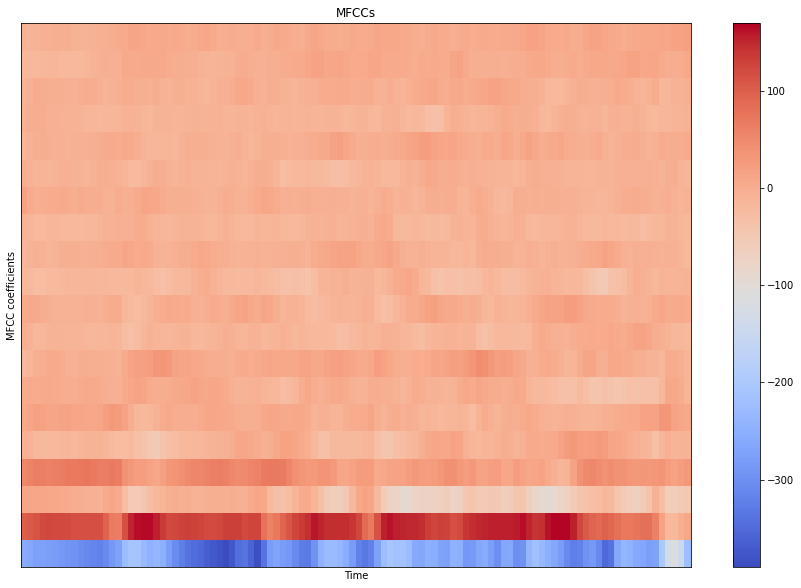

In [ ]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

In [ ]:
MFCCs.shape

(13, 200)